# **Klasifikasi Kanker Payudara Menggunakan Breast Cancer Dataset** 

# 1. Mengugumpulkan Data
Data diambil dari UCI Machine Learning
Link => http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data 
Keterangan :
* 569 sampel data dan 31 atribut (fitur)
* Tidak ditemukan missing value pada dataset
* class label pada atribut kedua

# 2. Menelaah Data
Terdiri dari :
* Load library yang dibutuhkan
* Load dataset
* Memberi nama header dan atributnya
* Menganalisa tipe dan relasi data
* Memberikan laporan atau kesimpulan dari hasil telaah *data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
url = "/content/drive/MyDrive/Associate Data Scientist/wdbc.csv"

data = pd.read_csv(url, header=None)

In [ ]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
# Memberi nama header atribut
data.columns = ['id', 'Class', 'fitur 1', 'fitur 2', 'fitur 3', 'fitur 4', 'fitur 5', 'fitur 6', 'fitur 7', 'fitur 8', 'fitur 9', 'fitur 10',
             'fitur 11', 'fitur 12', 'fitur 13', 'fitur 14', 'fitur 15', 'fitur 16', 'fitur 17', 'fitur 18', 'fitur 19', 'fitur 20',
             'fitur 21', 'fitur 22', 'fitur 23', 'fitur 24', 'fitur 25', 'fitur 26', 'fitur 27', 'fitur 28', 'fitur 29', 'fitur 30' 
]
data.head(5)

,id,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.drop('id', axis=1, inplace=True)
data.head()

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Menganalisa tipe dan relasi data
#  Melihat tipe dataset
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Melihat ukuran dataset
data.shape

(569, 31)

In [ ]:
# Melihat informasi tipe data semua kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     569 non-null    object 
 1   fitur 1   569 non-null    float64
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
# Melihat distribusi Class (apa saja jenisnya)
data['Class'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Melihat distribusi Class (jumlahnya tiap class)
data['Class'].value_counts()

B    357
M    212
Name: Class, dtype: int64

Text(0.5, 1.02, 'Distribusi Penderita Penyakit Kanker Payudara')

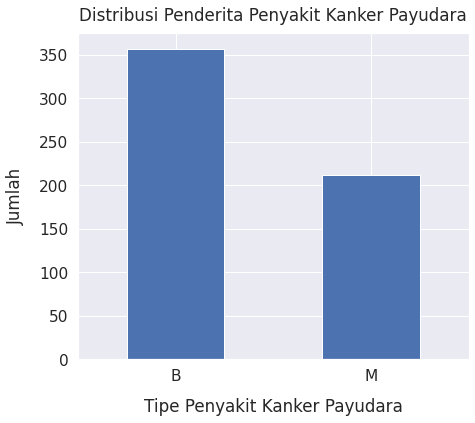

In [ ]:
# Melihat distribusi Class (Visualisasi diagram)
sns.set(font_scale=1.4)
data['Class'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Tipe Penyakit Kanker Payudara", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Penderita Penyakit Kanker Payudara", y=1.02)

In [ ]:
# Melihat deskripsi dataset
data.describe()

,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Kesimpulan

*   Jumlah fitur ada 31, lebih sedikit dibandingkan jumlah record data pasien yang berjumlah 569
*   Jumlah distribusi class B(Jinak) => 357 pasien, class M(Ganas) => 212 pasien.


# 3. Memvalidasi Data

In [ ]:
# Cek dataframe
data.head(5)

,Class,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Mengecek apakah dataframe ada nilai kosong
data.isnull().values.any()

False

# 4. Menentukan Objek

# 5. Membersihkan Data

Strategi pembersihan data : 
*   Hapus data yang duplikat
*   Cek fitur yang bernilai konstant

## Dataset Telah Bersih

In [ ]:
# Menghapus Data Duplikat
# Melihat ukuran baris dan kolom dataframe
data.shape

(569, 31)

In [ ]:
# Menghapud data duplikat dan melihat kembali ukuran baris & kolom dataframe
data = data.drop_duplicates()
data.shape

(569, 31)

## Tidak ada dataset yang sama

In [ ]:
# Menghapus fitur yang bernilai konstant
data = data.loc[:, data.apply(pd.Series.nunique) !=1]
data.shape

(569, 31)

## Tidak ada fitur yang bernilai konstan

# 6. Mengkonstruksi Data
terdiri dari:

*   Representasi fitur dan merubah tipenya.
*   Membagi data menjadi training dan testing.

*   Membandingkan Data Original, Data Normalisasi, Data Original PCA, Data Normalisasi PCA

In [ ]:
# Mengecek Representasi Fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     569 non-null    object 
 1   fitur 1   569 non-null    float64
 2   fitur 2   569 non-null    float64
 3   fitur 3   569 non-null    float64
 4   fitur 4   569 non-null    float64
 5   fitur 5   569 non-null    float64
 6   fitur 6   569 non-null    float64
 7   fitur 7   569 non-null    float64
 8   fitur 8   569 non-null    float64
 9   fitur 9   569 non-null    float64
 10  fitur 10  569 non-null    float64
 11  fitur 11  569 non-null    float64
 12  fitur 12  569 non-null    float64
 13  fitur 13  569 non-null    float64
 14  fitur 14  569 non-null    float64
 15  fitur 15  569 non-null    float64
 16  fitur 16  569 non-null    float64
 17  fitur 17  569 non-null    float64
 18  fitur 18  569 non-null    float64
 19  fitur 19  569 non-null    float64
 20  fitur 20  569 non-null    float6

In [ ]:
# Membagi Training dan Testing
X = data.iloc[:,1:32]
y = data['Class']

In [ ]:
# Menampilkan X
X.head()

,fitur 1,fitur 2,fitur 3,fitur 4,fitur 5,fitur 6,fitur 7,fitur 8,fitur 9,fitur 10,...,fitur 21,fitur 22,fitur 23,fitur 24,fitur 25,fitur 26,fitur 27,fitur 28,fitur 29,fitur 30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Menampilkan y
y.head()

0    M
1    M
2    M
3    M
4    M
Name: Class, dtype: object

## Data Original

In [ ]:
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in train dataset: 398
Total # of sample in test dataset: 171


## Data Normalisasi

In [ ]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [ ]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

## Data Original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original PCA:", ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:", var_ratio)
sv = pca.singular_values_
print("\n Singular Value:", sv)

Heads of Original PCA:             0           1          2          3          4         5   \
0  1160.142574 -293.917544  48.578398  -8.711975  32.000486  1.265415   
1  1269.122443   15.630182 -35.394534  17.861283  -4.334874 -0.225872   
2   995.793889   39.156743  -1.709753   4.199340  -0.466529 -2.652811   
3  -407.180803  -67.380320   8.672848 -11.759867   7.115461  1.299436   
4   930.341180  189.340742   1.374801   8.499183   7.613289  1.021160   

         6         7         8         9   ...        20        21        22  \
0  0.931337  0.148167  0.745463  0.589359  ...  0.021189  0.000241  0.002528   
1 -0.046037  0.200804 -0.485828 -0.084035  ...  0.005237  0.021069  0.001565   
2 -0.779745 -0.274026 -0.173874 -0.186994  ... -0.009865 -0.002394 -0.004125   
3 -1.267304 -0.060555 -0.330639 -0.144155  ...  0.011169  0.007063  0.001537   
4 -0.335522  0.289109  0.036087 -0.138502  ... -0.009916  0.010269  0.002204   

         23        24        25        26        27      

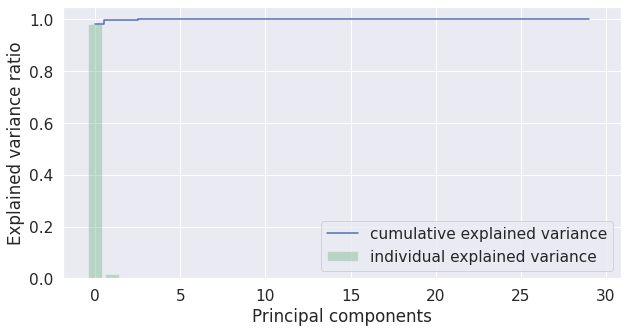

In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
# Dipilih 18  PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', ])

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

## Data Normalisasi PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0          1         2         3         4         5         6   \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

         7         8         9   ...        20        21        22        23  \
0 -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519 -0.175256   
1  0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718  0.011290   
2  0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291  0.102762   
3  1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105  0.153430   
4  0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454 -0.005332   

         24        25        26        27  

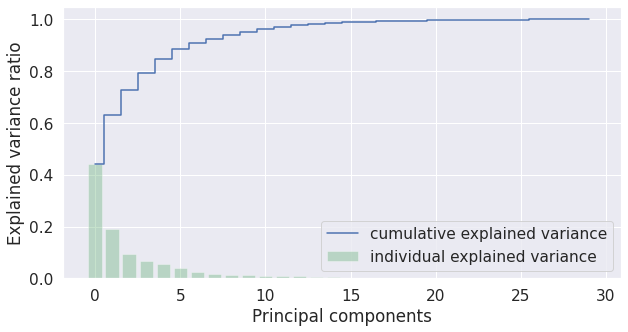

Cumulative explained ratio: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
var_ratio,
alpha=0.3333,
align='center',
label='individual explained variance',
color = 'g')
plt.step(range(len(cum_var_ratio)),
cum_var_ratio,
where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# 7. Menentukan Label Data

# 8. Membangun Model
*   Teknik Pemodelan yang dipakai:

  * Menggunakan Metode Decision Tree
  * Parameter yang dipakai:
      * [criterion: gini, entropy]
      * [max_depth]
      * [min sample split]
      * [min sample leaf]
* Skenario Pengujian:

  * Menggunakan akurasi, presisi dan recall.
  * Pengujian menggunakan Data Original.
  * Pengujian menggunakan Data yang sudah dinormalisasi.
  * Pengujian dengan Data Original yang diberikan PCA.
  * Pengujian menggunakan Data yang sudah dinormalisasi dan diberikan PCA.

## Decision Tree

In [ ]:
from tables import parameters
# Menyiapkan parameter yang digunakan
parameters_dt = {
    "model__max_depth": np.arange(1,21),
    "model__min_samples_leaf": np.arange(1,101,2),
    "model__min_samples_split": np.arange(2,11),
    "model__criterion": ['gini', 'entropy'],
    "model__random_state": [2022]
}

### Pemodelan Decision Tree

In [ ]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([
    ('model', DecisionTreeClassifier()),
])

### Pemodelan dengan Data Original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train, Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=3,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
  print('%s: %r' %(param_name, ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


### Pemodelan dengan Decision Tree dengan Data Normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm, Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

### Pemodelan Decision Tree dengan Data Original tapi diberikan PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca, Y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

### Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

# 9. Mengevaluasi Hasil Model

### Evaluasi Dengan Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9748743718592965
Precision pada training set:  0.9748743718592965
Recall pada training set:  0.9748743718592965
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


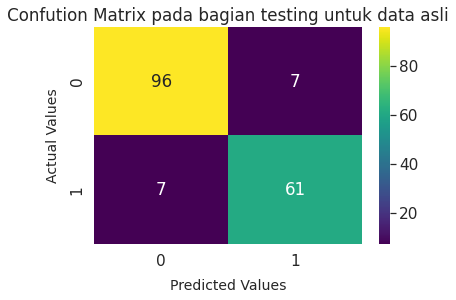

In [ ]:
# Visualisasi Confution Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test, ori_y_pred_dt_test), annot=True, cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confution Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi dengan Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')

print('Precision pada test set: ', norm_precision_dt_test)
norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9748743718592965
Precision pada training set:  0.9748743718592965
Recall pada training set:  0.9748743718592965
Akurasi pada test set:  0.9181286549707602
Precision pada test set:  0.9181286549707602
Recall pada test set:  0.9181286549707602


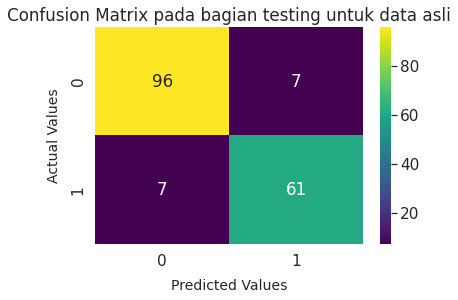

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi PCA dengan Data Original

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.964824120603015
Precision pada training set:  0.964824120603015
Recall pada training set:  0.964824120603015
Akurasi pada test set:  0.9239766081871345
Precision pada test set:  0.9239766081871345
Recall pada test set:  0.9239766081871345


### Evaluasi Data Normalisasi dengan PCA

In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9974874371859297
Precision pada training set:  0.9974874371859297
Recall pada training set:  0.9974874371859297
Akurasi pada test set:  0.9532163742690059
Precision pada test set:  0.9532163742690059
Recall pada test set:  0.9532163742690059


# 10. Melakukan Proses Review hasil Pemodelan

In [ ]:
models = [
    ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
    ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
    ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
    ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test)
]

In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.974874,0.918129
1,Decision Tree Data Normalisasi,0.974874,0.918129
2,Decision Tree PCA Data Original,0.964824,0.923977
3,Decision Tree PCA Data Normalisasi,0.997487,0.953216


In [ ]:
models_comparison = [
  ('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
  ('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
  ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
  ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.918129,0.918129,0.918129
1,Decision Tree Data Normalisasi,0.918129,0.918129,0.918129
2,Decision Tree PCA Data Original,0.923977,0.923977,0.923977
3,Decision Tree PCA Data Normalisasi,0.953216,0.953216,0.953216


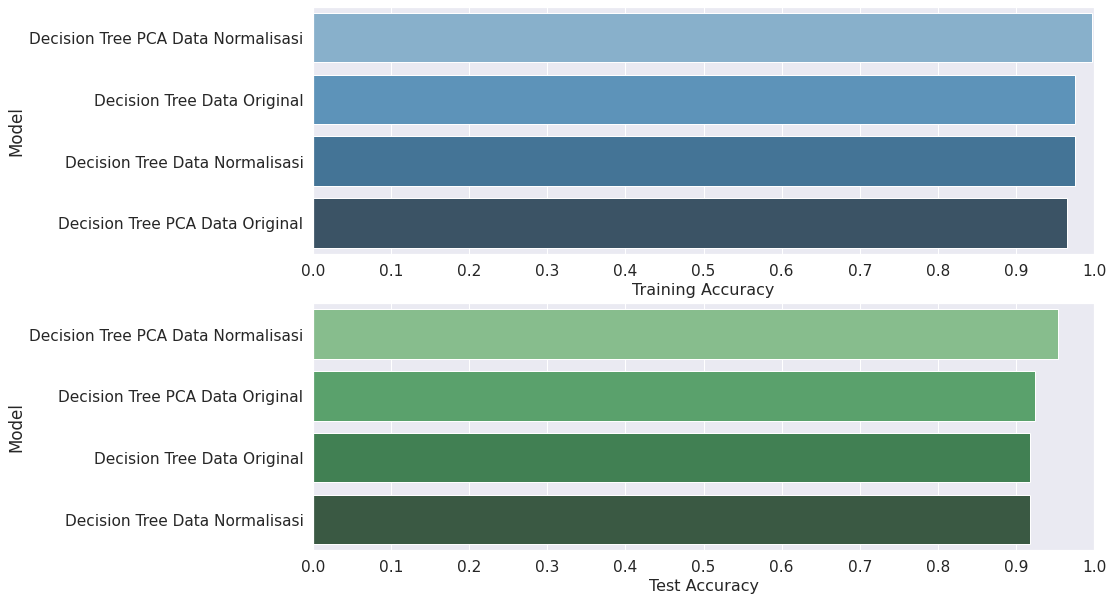

In [ ]:
# Visualisasi Perbandingan 4 model dengan Seaborn
f, axes = plt.subplots(2,1, figsize=(14,10))
predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])

#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])

#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

## Kesimpulan:


*   Model terbak dari Dataset Kanker Payudara adalah menggunakan Decision Tree PCA Data Normalisasi dengan nilai akurasi tertinggi pada Data Training sebesar 99,7% dan akurasi tertinggi pada Data Testing sebesar 95%